<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

`ml` contains the code base to process glycan for machine learning, construct state-of-the-art machine learning models, train them, and analyze trained models + glycan representations. It currently contains the following modules:

- `model_training` contains functions for training machine learning models
- `models` describes some examples for machine learning architectures applicable to glycans
- `processing` contains helper functions to prepare glycan data for model training
- `inference` can be used to analyze trained models, make predictions, or obtain glycan representations
- `train_test_split` contains various data split functions to get appropriate training and test sets

## model_training
>contains functions for training machine learning models

In [1]:
#| echo: false
#| output: asis
show_doc(EarlyStopping)

---

### EarlyStopping

>      EarlyStopping (patience=7, verbose=False)

Early stops the training if validation loss doesn't improve after a given patience.

In [2]:
#| echo: false
#| output: asis
show_doc(train_model)

---

### train_model

>      train_model (model, dataloaders, criterion, optimizer, scheduler,
>                   num_epochs=25, patience=50, mode='classification',
>                   mode2='multi')

trains a deep learning model on predicting glycan properties

| Arguments:
| :-
| model (PyTorch object): graph neural network (such as SweetNet) for analyzing glycans
| dataloaders (PyTorch object): dictionary of dataloader objects with keys 'train' and 'val'
| criterion (PyTorch object): PyTorch loss function
| optimizer (PyTorch object): PyTorch optimizer
| scheduler (PyTorch object): PyTorch learning rate decay
| num_epochs (int): number of epochs for training; default:25
| patience (int): number of epochs without improvement until early stop; default:50
| mode (string): 'classification', 'multilabel', or 'regression'; default:classification
| mode2 (string): further specifying classification into 'multi' or 'binary' classification;default:multi

| Returns:
| :-
| Returns the best model seen during training

In [3]:
#| echo: false
#| output: asis
show_doc(training_setup)

---

### training_setup

>      training_setup (model, lr, lr_patience=4, factor=0.2,
>                      weight_decay=0.0001, mode='multiclass', gsam_alpha=0.0)

prepares optimizer, learning rate scheduler, and loss criterion for model training

| Arguments:
| :-
| model (PyTorch object): graph neural network (such as SweetNet) for analyzing glycans
| lr (float): learning rate
| lr_patience (int): number of epochs without validation loss improvement before reducing the learning rate;default:4
| factor (float): factor by which learning rate is multiplied upon reduction
| weight_decay (float): regularization parameter for the optimizer; default:0.001
| mode (string): 'multiclass': classification with multiple classes, 'multilabel': predicting several labels at the same time, 'binary':binary classification, 'regression': regression; default:'multiclass'
| gsam_alpha (float): if higher than zero, uses GSAM instead of SAM for the optimizer

| Returns:
| :-
| Returns optimizer, learning rate scheduler, and loss criterion objects

In [4]:
#| echo: false
#| output: asis
show_doc(train_ml_model)

---

### train_ml_model

>      train_ml_model (X_train, X_test, y_train, y_test, mode='classification',
>                      feature_calc=False, libr=None, return_features=False,
>                      feature_set=['known', 'exhaustive'],
>                      additional_features_train=None,
>                      additional_features_test=None)

wrapper function to train standard machine learning models on glycans

| Arguments:
| :-
| X_train, X_test (list or dataframe): either lists of glycans (needs feature_calc = True) or motif dataframes such as from annotate_dataset
| y_train, y_test (list): lists of labels
| mode (string): 'classification' or 'regression'; default:'classification'
| feature_calc (bool): set to True for calculating motifs from glycans; default:False
| libr (list): sorted list of unique glycoletters observed in the glycans of our data; default:lib
| return_features (bool): whether to return calculated features; default:False
| feature_set (list): which feature set to use for annotations, add more to list to expand; default:['known','exhaustive']; options are: 'known' (hand-crafted glycan features), 'graph' (structural graph features of glycans), and 'exhaustive' (all mono- and disaccharide features)
| additional_features_train (dataframe): additional features (apart from glycans) to be used for training. Has to be of the same length as X_train; default:None
| additional_features_test (dataframe): additional features (apart from glycans) to be used for evaluation. Has to be of the same length as X_test; default:None

| Returns:
| :-
| Returns trained model

In [ ]:
mammal = [1 if k == 'Mammalia' else 0 for k in df_species[df_species.Phylum=='Chordata'].Class.values.tolist()]
X_train, X_test, y_train, y_test = general_split(df_species[df_species.Phylum=='Chordata'].target.values.tolist(), mammal)
model_ft, _, X_test = train_ml_model(X_train, X_test, y_train, y_test, feature_calc = True, feature_set = ['exhaustive'],
                         return_features = True)


Calculating Glycan Features...

Training model...
[12:02:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Evaluating model...
Accuracy of trained model on separate validation set: 0.882307092751364


In [5]:
#| echo: false
#| output: asis
show_doc(analyze_ml_model)

---

### analyze_ml_model

>      analyze_ml_model (model)

plots relevant features for model prediction

| Arguments:
| :-
| model (model object): trained machine learning model from train_ml_model

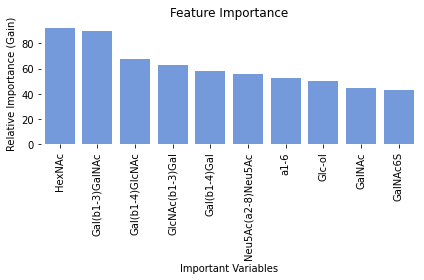

In [ ]:
analyze_ml_model(model_ft)

In [6]:
#| echo: false
#| output: asis
show_doc(get_mismatch)

---

### get_mismatch

>      get_mismatch (model, X_test, y_test, n=10)

analyzes misclassifications of trained machine learning model

| Arguments:
| :-
| model (model object): trained machine learning model from train_ml_model
| X_test (dataframe): motif dataframe used for validating model
| y_test (list): list of labels
| n (int): number of returned misclassifications; default:10

| Returns:
| :-
| Returns tuples of misclassifications and their predicted probability

In [ ]:
get_mismatch(model_ft, X_test, y_test)

[('Neu5Gc(a2-?)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Fuc(a1-3)[GalNAc(b1-4)]GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
  0.8825616240501404),
 ('HexNAc(b1-?)GalNAc', 0.2881334125995636),
 ('Man(a1-?)Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc', 0.8706997632980347),
 ('GalNAc(?1-?)[Fuc(a1-?)]GlcNAc', 0.6105344295501709),
 ('Neu5Ac(a2-3)Gal(b1-3)[GlcNAc(b1-6)]GalNAc-ol', 0.8564029335975647),
 ('Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
  0.8185762166976929),
 ('Neu5Ac(a2-?)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-?)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)Man(a1-?)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
  0.8457621932029724),
 ('Fuc(a1-2)[Gal(a1-3)]Gal(b1-3)GalNAc(b1-4)[Neu5Ac(a2-3)]Gal(b1-4)Glc1Cer',
  0.8508993983268738),
 ('Neu5Ac(a2-?)Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-?)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
  0

## models
>describes some examples for machine learning architectures applicable to glycans. The main portal is prep_models which allows users to setup (trained) models by their string names

In [ ]:
#requires torch_geometric
#show_doc(SweetNet)

In [ ]:
#requires torch_geometric
#show_doc(LectinOracle)

In [ ]:
#requires torch_geometric
#show_doc(LectinOracle_flex)

In [ ]:
#requires torch_geometric
#show_doc(NSequonPred)

In [ ]:
#requires torch_geometric
#show_doc(init_weights)

In [ ]:
#requires torch_geometric
#show_doc(prep_model)

## processing
>contains helper functions to prepare glycan data for model training

In [ ]:
#requires torch_geometric
#show_doc(dataset_to_graphs)

In [ ]:
#requires torch_geometric
#show_doc(dataset_to_dataloader)

In [ ]:
#requires torch_geometric
#show_doc(split_data_to_train)

## inference
>can be used to analyze trained models, make predictions, or obtain glycan representations

In [ ]:
#requires torch_geometric
#show_doc(glycans_to_emb)

In [ ]:
#show_doc(get_lectin_preds)

In [ ]:
#show_doc(get_Nsequon_preds)

In [ ]:
#show_doc(get_esm1b_representations)

In order to run `get_esm1b_representations`, you first have to run this snippet:

`!pip install fair-esm
import esm
model, alphabet = esm.pretrained.esm1b_t33_650M_UR50S()`

## train_test_split
>contains various data split functions to get appropriate training and test sets

In [7]:
#| echo: false
#| output: asis
show_doc(hierarchy_filter)

---

### hierarchy_filter

>      hierarchy_filter (df_in, rank='Domain', min_seq=5, wildcard_seed=False,
>                        wildcard_list=None, wildcard_name=None, r=0.1,
>                        col='target')

stratified data split in train/test at the taxonomic level, removing duplicate glycans and infrequent classes

| Arguments:
| :-
| df_in (dataframe): dataframe of glycan sequences and taxonomic labels
| rank (string): which rank should be filtered; default:'domain'
| min_seq (int): how many glycans need to be present in class to keep it; default:5
| wildcard_seed (bool): set to True if you want to seed wildcard glycoletters; default:False
| wildcard_list (list): list which glycoletters a wildcard encompasses
| wildcard_name (string): how the wildcard should be named in the IUPAC-condensed nomenclature
| r (float): rate of replacement, default:0.1 or 10%
| col (string): column name for glycan sequences; default:target

| Returns:
| :-
| Returns train_x, val_x (lists of glycans (strings) after stratified shuffle split)
| train_y, val_y (lists of taxonomic labels (mapped integers))
| id_val (taxonomic labels in text form (strings))
| class_list (list of unique taxonomic classes (strings))
| class_converter (dictionary to map mapped integers back to text labels)

In [ ]:
train_x, val_x, train_y, val_y, id_val, class_list, class_converter = hierarchy_filter(df_species,
                                                                                       rank = 'Kingdom')
print(train_x[:10])

['GlcNAc(b1-4)Man(a1-3)[GlcNAc(b1-6)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 'GlcNAc(b1-2)[GlcNAc(b1-6)]Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc', 'Man(a1-2)Man(a1-5)D-Araf(b1-2)D-Araf(a1-5)D-Araf(a1-5)D-Araf', 'Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc', 'Glc(b1-3)Gal1Cer', 'Neu5Ac(a2-6)Gal(?1-?)GlcNAc(b1-2)Man(a1-?)[Neu5Ac(a2-6)GalNAc(b1-4)GlcNAc(b1-2)Man(a1-?)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-?)]GlcNAc', '[Glc(b1-3)][ManNAc(a1-4)]GalNAc(a1-4)ManNAc(b1-4)[GlcNAc(b1-3)]GlcNAc(b1-6)GalNAc', 'GlcNAc(b1-3)Galf(b1-3)GlcNAcGro', 'Gal(a1-4)[Fuc(b1-2)][Glc(a1-6)]Glc(b1-6)Gal', 'Glc(a1-2)Glc(a1-3)[Gal(a1-6)]Glc(a1-3)[LDManHep(a1-7)]LDManHepOP(a1-3)LDManHepOP(a1-5)[Kdo(a2-4)]Kdo']


In [8]:
#| echo: false
#| output: asis
show_doc(general_split)

---

### general_split

>      general_split (glycans, labels, test_size=0.2)

splits glycans and labels into train / test sets

| Arguments:
| :-
| glycans (list): list of IUPAC-condensed glycan sequences as strings
| labels (list): list of labels used for prediction
| test_size (float): % size of test set; default:0.2 / 20%

| Returns:
| :-
| Returns X_train, X_test, y_train, y_test

In [ ]:
train_x, val_x, train_y, val_y = general_split(df_species.target.values.tolist(),
                                              df_species.Species.values.tolist())
print(train_x[:10])

['Galf(b1-3)Gal(a1-4)Neu5Ac(a2-3)Gal(b1-4)Glc', 'Neu5Gc(a2-?)Gal(b1-?)GalNAc(b1-4)[Neu5Ac(a2-8)Neu5Ac(a2-?)]Gal(b1-4)Glc1Cer', 'Neu5Ac(a2-8)Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-8)Neu5Ac(a2-6)]GalNAc(b1-4)Gal(b1-4)Glc1Cer', 'Man(a1-2)Man(a1-2)Man', 'Gal(b1-4)GlcNAc(b1-3)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)]GalNAc', 'Gal(b1-?)GlcNAc(b1-3)Gal(b1-?)[Fuc(a1-?)]GlcNAc(b1-3)Gal(b1-4)Glc-ol', 'Man(a1-2)Man6PEtN(a1-2)Man(a1-6)[GalNAc(b1-4)]Man2PEtN(a1-4)GlcN', 'Neu5Ac(a2-8)Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-8)Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 'GlcN(a1-6)GlcNAc', 'Man(a1-2)Man(a1-3)Man(a1-3)[Man(a1-2)Man(a1-3)[Man(a1-2)Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc']


In [9]:
#| echo: false
#| output: asis
show_doc(prepare_multilabel)

---

### prepare_multilabel

>      prepare_multilabel (df, rank='Species', glycan_col='target')

converts a one row per glycan-species/tissue/disease association file to a format of one glycan - all associations

| Arguments:
| :-
| df (dataframe): dataframe where each row is one glycan - species association
| rank (string): which label column should be used; default:Species
| glycan_col (string): column name of where the glycan sequences are stored; default:target

| Returns:
| :-
| (1) list of unique glycans in df
| (2) list of lists, where each inner list are all the labels of a glycan